Let's being with our import statements

In [2]:
import string
import pandas as pd
import re

We want to construct a dictionary that takes all lowercase letters to their appropriate numerical value

In [2]:
alpha2num = dict(zip(string.ascii_lowercase,range(1, 27)))

We now want to define a function that converts each letter to its number, casts it as a string and then concatenates all of that together

In [3]:
def string_to_longnum(word,divisor):
    return int("".join([str(alpha2num[i]) for i in word]))%divisor

We now want to take the csv file which holds the 5000 most common English words, lower their case (to avoid things like "I" and "Mr"), and then remove any non-alphanumeric characters. The data at index 0 is blank space left over from the 

In [4]:
df = pd.read_csv('Most_Used_Words.csv')
df=df.drop(df.index[0])
df['Word']=df['Word'].map(lambda x: x.lower())
df['Word']=df['Word'].map(lambda x: re.sub(r'\W+', '', x))

In [13]:
df.head()

,Rank,Word,Part of speech,Frequency,Dispersion,remainder_3,remainder_5
1,1.0,the,a,22038615.0,0.98,0,0
2,2.0,be,v,12545825.0,0.97,1,0
3,3.0,and,c,10741073.0,0.99,1,4
4,4.0,of,i,10343885.0,0.97,0,1
5,5.0,a,a,10144200.0,0.98,1,1


We now add columns to our dataframe by applying our string_to_longnum function to the word data, and use the dataframe's built in hist functions to plot it

In [7]:
df['remainder_3']=df['Word'].apply(lambda x:string_to_longnum(x,3))

In [9]:
df['remainder_5']=df['Word'].apply(lambda x:string_to_longnum(x,5))

For the division by 3 data we see an almost perfectly flat distribution

In [1]:
ax=df.hist(column='remainder_3')
fig = ax.get_figure()
fig.savefig('Mod_3.pdf')


NameError: name 'df' is not defined

For the mod 5 data we see that approximately half of the entries are divisible by 5. This is indicative of the density of words ending in 'E','O','T', and 'Y'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106d1cb90>]], dtype=object)

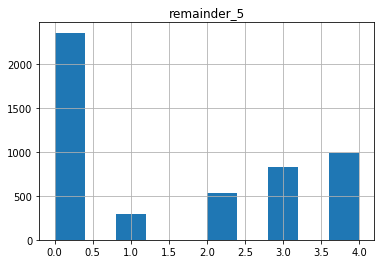

In [12]:
df.hist(column='remainder_5')